# 비트코인 시세 예측하기

비트코인 시세처럼 연속적인 시간에 따라 다르게 측정되는 데이터를 시계열 데이터라 하며, 이를 분석하는 것을 '시계열 데이터 분석'이라고 합니다. 시계열 데이터 분석은 심장 박동 데이터처럼 규칙적 시계열 데이터를 분석하는 것과 비트코인 시세 예측처럼 불규칙적 시계열 데이터를 분석하는 것으로 구분할 수 있습니다.

## step 1 탐색: 시간 정보가 포함된 데이터 살펴보기

우선 비트코인 데이터를 탐색합니다. 다음 코드로 데이터셋을 살펴보면, 비트코인 데이터는 총 365개의 행으로 이루어진 것을 알 수 있습니다.  
또한 데이터는 결측값이 없이 날짜와 가격에 대한 2개의 피처로 구성되어 있습니다. 이러한 데이터셋을 시계열 데이터셋이라고 합니다.

In [2]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Source : https://www.blockchain.com/ko/charts/market-price?timespan=60days
file_path = './data/market-price.csv'
bitcoin_df = pd.read_csv(file_path, names = ['day', 'price'])

# 기본 정보를 출력합니다.
print(bitcoin_df.shape)
print(bitcoin_df.info())
bitcoin_df.tail()

(365, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     365 non-null    object 
 1   price   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


,day,price
360,2018-08-22 00:00:00,6575.229167
361,2018-08-23 00:00:00,6434.881667
362,2018-08-24 00:00:00,6543.645714
363,2018-08-25 00:00:00,6719.429231
364,2018-08-26 00:00:00,6673.274167


그리고 아래의 코드는 시계열 정보를 데이터 프레임의 index로 설정하여 가격의 추이를 시각화한 것입니다.

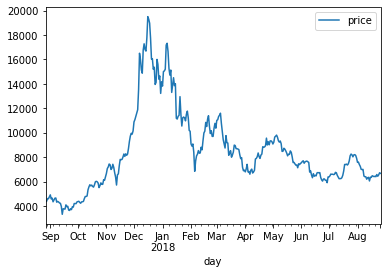

In [3]:
# to_datetime으로 day 피처를 시계열 피처로 변환합니다.
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])

# day 데이터 프레임의 index로 설정합니다.
bitcoin_df.index = bitcoin_df['day']
bitcoin_df.set_index('day', inplace=True)

# 일자별 비트코인 시세를 시각화합니다.
bitcoin_df.plot()
plt.show()

## step 2 예측:파이썬 라이브러리를 활용해 시세 예측하기

이번에는 첫 번째로 사용할 시계열 예측 분석 방법은 ARIMA 분석 방법입니다.  
ARIMA는 전통적인 시계열 예측 방법으로 크게 두 가지 개념을 포함하고 있습니다. 첫 번째는 AR 모델로 자기 자신의 과거를 정보로 사용하는 개념입니다. 이는 '현재의 상태는 이전의 상태를 참고해서 계산된다'라는 아이디어를 전제로 합니다.  
두 번째 개념은 MA모델로 '이전 항에서의 오차를 이용하여 현재 항의 상태를 추론 하겠다'라는 방법입니다.  
그리고 이 둘을 합친 것은 ARMA 모델이라고 하며, 조금 더 나아간 ARIMA모델은 ARMA 모델에 추세 변동의 경향성까지 반영한 방법입니다.  
파이썬에서는 statsmodel 모듈로 ARIMA 분석을 수행할 수 있습니다.  
다음 코드는 ARIMA 분석의 실행 과정입니다. ARIMA 클래스에 order=(2,1,2)라고 입력되어진 파라미터는 'AR이 몇번째 과거까지를 바라보는지에 대한 파라미터(2), 차분에 대한 파라미터(!), MA가 몇 번째 과거까지를 바라보는지에 대한 파라미터(2)'를 의미하는 것입니다.  
차분이란 현재 상태의 변수에서 바로 전 상태의 변수를 빼주는 것을 의미하며, 시계열 데이터의 불규칙성을 조금이나마 보정해주는 역할을 합니다. 또한 앞서 말한 ARIMA 모델의 경향성을 의미합니다.  
이제 아래의 실행 결과를 분석해 봅시다. 실행 결과의 표를 살펴보면 상수항을 제외한 모든 계수의 p-value가  0.05 이하로 유의미한 것으로 나타납니다. 이것은 AR과 MA 모두 2로 설정하는 것이 꽤나 의미 있는 분석 결과를 도출한다는 것입니다.

#### ARIMA 모델 활용하기: 모델 학습

In [6]:
!pip3 install statsmodels

    100% |████████████████████████████████| 9.5MB 153kB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/c3/e2/00cacecafbab071c787019f00ad84ca3185952f6bb9bca9550ed83870d4d/pandas-1.1.5-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/c8/89/63171228d5ced148f5ced50305c89e8576ffc695a90b58fe5bb602b910c2/scipy-1.5.4-cp36-cp36m-manylinux1_x86_64.whl
    100% |████████████████████████████████| 235kB 1.1MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/45/b2/6c7545bb7a38754d63048c7696804a0d947328125d81bf12beaa692c3ae3/numpy-1.19.5-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/70/94/784178ca5dd892a98f113cdd923372024dc04b8d40abe77ca76b5fb90ca6/pytz-2021.1-py2.py3-none-any.whl
  Using cached https://files.pythonhos

In [9]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(bitcoin_df.price.values, order=(2,1,2))
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

/home/wntkdl94/.local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2787.553
Method:                       css-mle   S.D. of innovations            512.415
Date:                Tue, 20 Apr 2021   AIC                           5587.107
Time:                        23:40:48   BIC                           5610.490
Sample:                             1   HQIC                          5596.400
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3192     27.794      0.227      0.820     -48.156      60.795
ar.L1.D.y     -0.3788      1.827     -0.207      0.836      -3.959       3.201
ar.L2.D.y      0.1586      1.191      0.133      0.8

/home/wntkdl94/.local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


다음으로 ARIMA 모델의 학습 결과를 알아보겠습니다. 아래의 실행 결과 중 첫 번째 그래프는 학습한 모델에 학습 데이터셋을 넣었을 때의 시계열 예측 결과입니다.  
plot_predict()라는 함수로 이러한 시각화를 자동으로 수행할 수 있습니다.

#### ARIMA 모델 활용하기: 모델의 성능 & 예측 결과 시각화